### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [4]:
target = new_client.target
target_query = target.search('hiv')
target_result = pd.DataFrame.from_dict(target_query)

In [6]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Human immunodeficiency virus,HIV protease,19.0,False,CHEMBL3638323,"[{'accession': 'Q9YQ30', 'component_descriptio...",SINGLE PROTEIN,12721
1,[],HIV-1 M:B_Lai,HIV-1 M:B_Lai,15.0,False,CHEMBL612775,[],ORGANISM,290579
2,[],Homo sapiens,Transcription factor HIVEP2,12.0,False,CHEMBL4523214,"[{'accession': 'P31629', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Ubiquitin thioesterase OTU1,12.0,False,CHEMBL4630833,"[{'accession': 'Q5VVQ6', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'P51681', 'xref_name': None, 'xre...",Homo sapiens,C-C chemokine receptor type 5,11.0,False,CHEMBL274,"[{'accession': 'P51681', 'component_descriptio...",SINGLE PROTEIN,9606
5,"[{'xref_id': 'P15822', 'xref_name': None, 'xre...",Homo sapiens,Human immunodeficiency virus type I enhancer-b...,9.0,False,CHEMBL2909,"[{'accession': 'P15822', 'component_descriptio...",SINGLE PROTEIN,9606
6,"[{'xref_id': 'Q92993', 'xref_name': None, 'xre...",Homo sapiens,Histone acetyltransferase KAT5,9.0,False,CHEMBL5750,"[{'accession': 'Q92993', 'component_descriptio...",SINGLE PROTEIN,9606
7,[],Homo sapiens,CCR5/mu opioid receptor complex,9.0,False,CHEMBL3301384,"[{'accession': 'P51681', 'component_descriptio...",PROTEIN COMPLEX,9606
8,[],Homo sapiens,Zinc finger and BTB domain-containing protein 7A,7.0,False,CHEMBL5069375,"[{'accession': 'O95365', 'component_descriptio...",SINGLE PROTEIN,9606
9,[],Homo sapiens,80S Ribosome,0.0,False,CHEMBL3987582,"[{'accession': 'P08865', 'component_descriptio...",PROTEIN NUCLEIC-ACID COMPLEX,9606


In [7]:
selected_target1 = target_result.target_chembl_id[4]
selected_target1

'CHEMBL274'

In [8]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [9]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,335.0
1,None,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,28.0
2,None,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,C-C chemokine receptor type 5,9606,None,None,IC50,nM,UO_0000065,None,10.0


### Only Selecting the required Columns

In [10]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [11]:
df1_selected = df1[columns]

In [12]:
len(df1_selected)

3878

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [13]:
df1_selected.isnull().sum()

canonical_smiles       32
molecule_chembl_id      0
standard_value        940
dtype: int64

In [14]:
df1_selected['standard_value'].dtype

dtype('O')

In [15]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-15-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [16]:
df1_selected['standard_value'].dtype

dtype('float64')

In [17]:
df1_selected['standard_value'].head(3)

0    335.0
1     28.0
2     10.0
Name: standard_value, dtype: float64

In [18]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
df1_selected.isnull().sum()

canonical_smiles      32
molecule_chembl_id     0
standard_value         0
dtype: int64

In [20]:
if df1_selected['canonical_smiles'].isnull().sum() > 0:
  df1_selected = df1_selected.dropna(axis=0)

In [21]:
len(df1_selected)

3846

In [22]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [23]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [24]:
df1_selected.describe()

,standard_value
count,3.846000e+03
mean,2.169525e+04
std,2.878463e+05
min,3.000000e-03
25%,6.600000e+00
50%,1.200000e+02
75%,2.169525e+04
max,1.000000e+07


In [25]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-25-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [26]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-23-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))


In [27]:
df1_selected['standard_value'].head()

0    6.474955
1    8.091947
2    8.091947
3    8.091947
4    8.091947
Name: standard_value, dtype: float64

In [28]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [29]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

### Creating labels and features

In [30]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [31]:
len(df1_x),len(df1_y)

(3846, 3846)

In [32]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('hiv_labels.csv',index=False)

### A quick look at files

In [33]:
! ls

hiv_labels.csv	molecule.smi  sample_data


In [34]:
! cat molecule.smi | head -5

C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2nnnc2-c2ccccc2)c2ccccc2)CC1	CHEMBL105460
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2cncn2)c2ccccc2)CC1	CHEMBL105606
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(C)(Cn2cnc3ccccc32)c2ccccc2)CC1	CHEMBL105570
CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c1cccc(Cl)c1)S(=O)(=O)c1ccccc1	CHEMBL83338
C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(Cn2ncc3ccccc32)c2ccccc2)CC1	CHEMBL325357


### Using padel Descriptor to break it into dataset form

In [35]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 08:57:15--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 08:57:16--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-03-10 08:57:17 (205 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 08:57:17--  https://gi

In [36]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [37]:
! bash padel.sh

Processing CHEMBL105606 in molecule.smi (2/3846). 
Processing CHEMBL105460 in molecule.smi (1/3846). 
Processing CHEMBL105570 in molecule.smi (3/3846). Average speed: 8.97 s/mol.
Processing CHEMBL83338 in molecule.smi (4/3846). Average speed: 5.04 s/mol.
Processing CHEMBL325357 in molecule.smi (5/3846). Average speed: 3.62 s/mol.
Processing CHEMBL105572 in molecule.smi (6/3846). Average speed: 2.93 s/mol.
Processing CHEMBL107750 in molecule.smi (7/3846). Average speed: 2.46 s/mol.
Processing CHEMBL105659 in molecule.smi (8/3846). Average speed: 2.12 s/mol.
Processing CHEMBL107380 in molecule.smi (9/3846). Average speed: 1.89 s/mol.
Processing CHEMBL104793 in molecule.smi (10/3846). Average speed: 1.73 s/mol.
Processing CHEMBL106231 in molecule.smi (11/3846). Average speed: 1.86 s/mol.
Processing CHEMBL321539 in molecule.smi (12/3846). Average speed: 1.61 s/mol.
Processing CHEMBL322439 in molecule.smi (13/3846). Average speed: 1.56 s/mol.
Processing CHEMBL104474 in molecule.smi (14/3846

### Model selection and usage

### Importing Modules

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [56]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('hiv_labels.csv')

In [57]:
X = X.dropna(axis=0)
Y = Y.drop(3065,axis=0)

In [58]:
len(X),len(Y)

(3845, 3845)

In [59]:
Y['standard_value'].isnull().sum()

0

In [60]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [61]:
Y.standard_value.unique()

array([ 6.47,  8.09,  6.61,  6.95,  8.11,  7.78,  7.55,  7.97,  8.18,
        6.34,  6.29,  8.1 ,  8.13,  7.56,  7.91,  8.15,  5.77,  7.82,
        7.59,  8.17,  5.66,  7.61,  6.93,  6.9 ,  8.  ,  7.81,  7.54,
        6.39, 11.  ,  8.26,  9.12,  6.59,  8.2 ,  8.21,  6.82,  6.01,
        8.32,  4.98,  5.07,  8.08,  5.36,  8.29,  4.62,  8.27,  4.96,
        4.06,  8.25,  8.16,  9.14,  8.02,  8.03,  8.04,  8.19,  6.64,
        8.24,  6.07,  6.36,  8.07,  7.99,  6.42,  6.21,  8.22,  6.37,
        5.62,  6.22,  9.89,  6.14,  7.5 ,  7.44,  6.16,  5.57,  5.74,
        5.31,  8.28,  5.68,  5.39,  5.21,  5.1 ,  6.11,  5.44,  5.59,
        5.06,  9.46,  6.12,  8.14,  6.13,  9.62,  8.72,  9.68,  9.72,
        9.02,  8.01,  8.39,  6.88,  9.66,  5.12,  4.77,  4.31,  4.1 ,
        4.65,  3.57,  4.85,  5.82,  7.33,  5.32,  5.33,  6.55,  5.38,
        8.36,  5.24,  5.79,  7.36,  6.27,  6.49,  6.66,  6.46,  6.98,
        7.13,  6.58,  9.86,  9.29,  8.51,  8.41,  8.31,  7.28,  7.07,
        7.05,  6.79,

In [62]:
Y.describe()

,standard_value
count,3845.000000
mean,7.818876
std,0.911440
min,2.730000
25%,8.090000
50%,8.090000
75%,8.090000
max,11.520000


In [63]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [64]:
X.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
Y[:5]

array([6.47, 8.09, 8.09, 8.09, 8.09])

In [66]:
X.shape

(3845, 881)

### Defining all the Regressors

In [67]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [68]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [69]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.16685861277453906

Mean Sqaured Error : 0.5888758005635747

Mean Absolute Error : 0.3984511526799423

Root Mean Squared : 0.7673824343595407


### Decision Tree Regressor

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.3453046749373665

Mean Sqaured Error : 0.9508798621731116

Mean Absolute Error : 0.42909854134140574

Root Mean Squared : 0.9751306897914308


### Support Vector Regressor

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.09983593480946851

Mean Sqaured Error : 0.6362483519069098

Mean Absolute Error : 0.3360994576269553

Root Mean Squared : 0.7976517735872651


### Extra Tree Regression

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.3061317364726355

Mean Sqaured Error : 0.9231918900563171

Mean Absolute Error : 0.42397313617454385

Root Mean Squared : 0.9608287516807129


### Lasso Regression

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.0014824476071071402

Mean Sqaured Error : 0.7078615792320595

Mean Absolute Error : 0.5015971251063217

Root Mean Squared : 0.8413451011517565


### Ridge Regression

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.1600514483896487

Mean Sqaured Error : 0.5936871980504642

Mean Absolute Error : 0.5028718238494538

Root Mean Squared : 0.7705109980074679


### Orthogonal Matching Pursuit Regressor

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.15541110444974282

Mean Sqaured Error : 0.5969670570208636

Mean Absolute Error : 0.4898067128347899

Root Mean Squared : 0.7726364326258914


### Linear Regression

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -1.214950464884076e+19

Mean Sqaured Error : 8.587437122002971e+18

Mean Absolute Error : 182025288.89941505

Root Mean Squared : 2930432923.989725


### Model Performance

In [78]:
import seaborn as sns

In [79]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [80]:
model_performance = pd.DataFrame.from_dict(di)

In [81]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,7.673824e-01,1.668586e-01
1,Decision Tree,9.751307e-01,-3.453047e-01
2,Support Vector,7.976518e-01,9.983593e-02
3,Extra Tree,9.608288e-01,-3.061317e-01
4,Lasso,8.413451e-01,-1.482448e-03
5,Ridge,7.705110e-01,1.600514e-01
6,Orthogonal,7.726364e-01,1.554111e-01
7,Linear,2.930433e+09,-1.214950e+19


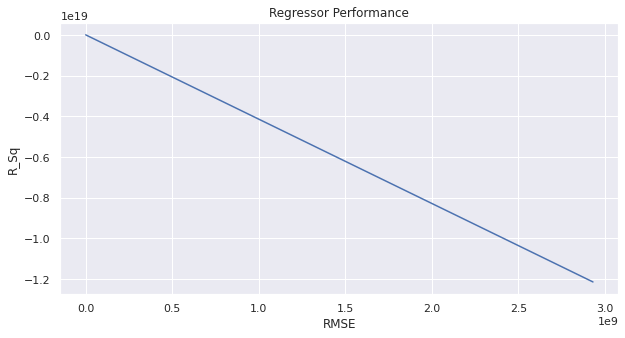

In [82]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [84]:
rmse

0.7680781513709665

### Saving model state for later use

In [85]:
import pickle

pickle.dump(rfe,open("hiv_model.pkl","wb"))